<font color = '84AD61'>
    
# __Tutorial: Geospatial Plotting of Total Green House Emissions (GHE) for Various Cities Across the World.__
    

<font color = '5780BC'>

## Overview

In this tutorial, we will learn how to make a geospatial map that visualizes various cities' green house gas emissions (GHE). We will overlay a scatterplot of cities' longitude and latitude over a map, then manipulate the aesthetics of the points based on each city's GHE (meausred in metric tonnes of CO2).

<font color = '5780BC'>

### Packages

There are only a few packages we will need to complete this project. We will use Numpy and Pandas for the data importing, cleaning, manipulation. Additionally, we will breifly use the Seaborn package for a simple visualization of our data, but for our primary data visualization, we will use the __Plotly__ package. We can pip install this package try doing this either in the terminal or in the notebook.

In [1]:
# install Plotly 
# pip install plotly == 4.2.1

In [2]:
# import the remainder of our packages
import pandas as pd
import numpy as np
import seaborn as sns 

<font color = '5780BC'>
    
### Part One: Data Importing and Cleaning

The dataset we will use for this geospatial visualization is provided by the Carbon Disclosure Project. The dataset is from 2016 and can be found at: https://data.cdp.net/Emissions/2016-Citywide-GHG-Emissions/dfed-thx7/data. From this webpage, we can export the dataset as a .csv file (see image below).

<div>
<img src = "cdp.png" width = 500>
<div>

After downloading the .csv file, we will read it as a dataframe, using the Pandas read_csv function.

In [3]:
# read in the ghe 2016 dataset
ghe = pd.read_csv('2016_-_Citywide_GHG_Emissions.csv')

Let's look at the dataframe we have created.

In [4]:
print(ghe.shape)
ghe.head(3)

(187, 27)


,Account Number,City Name,Country,City Short Name,C40,Reporting Year,Measurement Year,Boundary,Primary Methodology,Methodology Details,...,Current Population,City GDP,GDP Currency,Year of GDP,GDP Source,Average annual temperature (in Celsius)​,​Land area (in square km),Average altitude (m),City Location,Country Location
0,54650,Prefeitura de Palmas,Brazil,Palmas,NaN,2016,12/31/2013 12:00:00 AM,A metropolitan area,Global Protocol for Community-Scale Greenhouse...,O diagnóstico qualitativo das informações comp...,...,272726.0,899887.0,BRL Brazilian Real,2016.0,NaN,NaN,NaN,NaN,"(-10.249091, -48.324286)","(-14.235004, -51.92528)"
1,59996,Batangas City,Philippines,Batangas,NaN,2016,12/20/2010 12:00:00 AM,A metropolitan area,2006 IPCC Guidelines for National Greenhouse G...,NaN,...,332458.0,NaN,PHP Philippine Peso,NaN,NaN,25.0,285.0,10.0,"(13.756465, 121.058308)","(12.879721, 121.774017)"
2,55179,City of Okayama,Japan,Okayama,NaN,2016,03/31/2013 12:00:00 AM,Administrative boundary of a local government,Other,NaN,...,705917.0,2066421.0,JPY Japanese yen,2015.0,岡山県統計分析課,16.1,790.0,55.0,"(34.655146, 133.919502)","(36.204824, 138.252924)"


As we can see, there are 187 observations and 27 variables in this dataframe. At the most basic level, our geospatial viz. relies on each cities longitude and latitude. The column titled 'City Location' contains this information. Let's take a look at this column to see how it's formatted:

In [5]:
print(type(ghe['City Location'][1]))
ghe['City Location'].head()

<class 'str'>


0    (-10.249091, -48.324286)
1     (13.756465, 121.058308)
2     (34.655146, 133.919502)
3     (42.258634, -87.840625)
4     (38.890604, -90.184276)
Name: City Location, dtype: object

This column lists, as a string, each city's latitude and longitude, __in this order__ (a quick search on https://www.latlong.net/ can help us identify which coordinate is which, since they are not labeled in this column). As is, this column is not useful in creating our data visualization. 

At its core, our visualization will be a scatterplot of each city's longitude and latitude, so from 'City Location' we need to create two columns: one that contains each city's longitude and one that contains each city's latitude. 

Before we split up this column, let's get ride of the parentheses.

In [6]:
# replace '(' and ')' with blanks:
ghe['City Location'] = ghe['City Location'].str.replace('(', '')
ghe['City Location'] = ghe['City Location'].str.replace(')', '')

Let's look at the changes we have made to this column.

In [7]:
ghe['City Location'].head(3)

0    -10.249091, -48.324286
1     13.756465, 121.058308
2     34.655146, 133.919502
Name: City Location, dtype: object

This looks good. Now we can split up the value in this column. Since the column is of the class 'str', we can use the str.split function. Each latitude and longitude is seperated by a comma, so we can split up the string on this character:

In [8]:
ghe['City Location'] = ghe['City Location'].str.split(',')

Let's look at the result: 

In [9]:
print(type(ghe['City Location'][1]))
ghe['City Location'].head(3)

<class 'list'>


0    [-10.249091,  -48.324286]
1     [13.756465,  121.058308]
2     [34.655146,  133.919502]
Name: City Location, dtype: object

Each observation now contains a list of length two, the first element being the latitude and the second being the longitude.

Now we can create two seperate columns, based on the two elements each list of this series. To do this, we can loop through each observation and assign each index (0 or 1) to their respective latitude/longitude column.

In [10]:
# create 'Longitude' and 'Latitude' columns 
ghe['Latitude'] = [i[0] for i in ghe['City Location']] # each 0th element is the latitude
ghe['Longitude'] = [j[1] for j in ghe['City Location']] # each 1st element is the longitude

Let's compare these two new columns with the original 'City Location' column to make sure they contain the correct information

In [11]:
print(type(ghe['Latitude'][1])) # print out the class of latitude column
print(type(ghe['Longitude'][1])) # pring out the class of the longitude column
ghe.loc[:,['City Location', 'Latitude', 'Longitude']].head(3) # compare 'city location' to 'longitude'/'latitude'

<class 'str'>
<class 'str'>


,City Location,Latitude,Longitude
0,"[-10.249091, -48.324286]",-10.249091,-48.324286
1,"[13.756465, 121.058308]",13.756465,121.058308
2,"[34.655146, 133.919502]",34.655146,133.919502


The Latitude and Longitude columns contain the correct values, however, each are of the class 'str', so they will not be useful in making a scatterplot. Let's convert these columns to be numeric columns, so we can use them with our plotting functions.

In [12]:
ghe['Latitude'] = pd.to_numeric(ghe['Latitude']) 
ghe['Longitude'] = pd.to_numeric(ghe['Longitude'])
print(type(ghe['Latitude'][1])) # print out the class of latitude column
print(type(ghe['Longitude'][1])) # pring out the class of the longitude column

<class 'numpy.float64'>
<class 'numpy.float64'>


Now our latitude and longitudes are floats, or continuous, numeric values.

We have the spatial data we need for our data visualization, so let's start making plots.

<font color = '5780BC'>
    
### Part Two: Data Visualization

Now that we have our data in the correct format, we can begin building our geospatial visualization. To get a basic idea of how our visualization works, let's make a simple scatter plot of longitude and latitude. We will use the Seaborn package scatterplot function to see a skeletal version of our visualization.

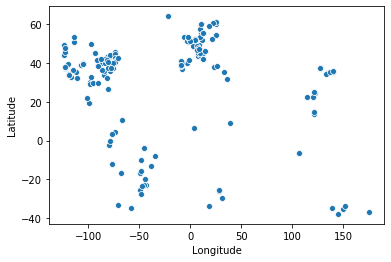

In [13]:
fig1 = sns.scatterplot(x = 'Longitude', y = 'Latitude', data = ghe)

This plot vaguely resembles a world map, which is reasurring that our data's longitude and latitude are effective for geospatial visualization. However, this plot is rather bare and does not communicate anything about GHE. One way we can visualize a city's GHE is to change the size of their point on the scatterplot based on their C02 emissions. Our dataset has a column ('Total City-Wide Emissions (metric tonnes CO2e)') contains this information, so we can pass this information into the scatterplot's 'size' argument. 

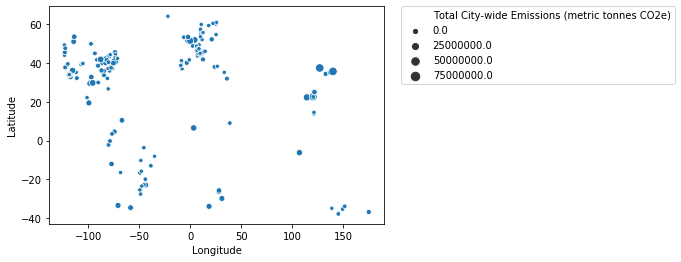

In [14]:
fig2 = sns.scatterplot(x = 'Longitude', y = 'Latitude', size ='Total City-wide Emissions (metric tonnes CO2e)', data = ghe,
                      )
fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # this line of code just moves the legend out to the side

Now, our plot not only displays the location of different cities, but how their C02 emssions compare to one another. This is a helpful layer of information, but we can further enhance this visualization by using color, as well as overlaying it on top of a world map. Let's start with coloring the points.

<font color = '5780BC'>
    
### Part Three: A Little More Data Cleaning/ Manipulation

Our dataset includes information about whether a city has increased or decreased their emissions since the previous year.

In [15]:
ghe['Increase/Decrease from last year'].head(10)

0    This is our first year of calculation
1                                      NaN
2                                      NaN
3    This is our first year of calculation
4    This is our first year of calculation
5                                Decreased
6                                Decreased
7                                Decreased
8                                      NaN
9                                Increased
Name: Increase/Decrease from last year, dtype: object

We can color the points on our plot to based on the data in this column to communicate a city's efforts to reduce their GHE. First, however, we need to clean up this column before we can effectively use it. Let's summarize what's in this column to decide how we are going to communicate it.  

In [16]:
ghe['Increase/Decrease from last year'].unique()

array(['This is our first year of calculation', nan, 'Decreased',
       'Increased', 'Stayed the same', 'Other'], dtype=object)

If we consider this column as a factored variable, there are six levels. In reality, there are only three meaningful levels, though: 'Increased', 'Decreased', or 'Stayed the same'. The remaining three (nan, 'Other', and 'This is our first year of calculation'), really all tell us the same information, and could be consolidated to one level. To make the data in this column easier to use for our data visualization, let's consolidate these there factor levels into one. To do this, let's make a new column that transforms the information in 'Increase/Decrease from last year'.

In this new column, let's keep 'Increased',  'Decreased', and 'Stayed the same', but let's tranform any observation that says 'This is our first year of calculation', 'nan', or 'Other', into a new observation that says 'other'.

In [17]:
ghe['ghe_change_new'] = np.where(ghe['Increase/Decrease from last year'] == 'Increased', 'Increased',
                                np.where(ghe['Increase/Decrease from last year'] == 'Decreased', 'Decreased',
                                        np.where(ghe['Increase/Decrease from last year'] == 'Stayed the same', 'Stayed the same',
                                                np.where((ghe['Increase/Decrease from last year'] == 'Other') | 
                                                        (ghe['Increase/Decrease from last year'] == 'This is our first year of calculation') | 
                                                        (ghe['Increase/Decrease from last year'].isnull() == True), 'Other', np.nan))))

Let's summarize this new column and compare it to the column from which we did the transformation.

In [18]:
ghe['ghe_change_new'].unique()

array(['Other', 'Decreased', 'Increased', 'Stayed the same'], dtype=object)

In [19]:
print(ghe['ghe_change_new'].head(7))
print(ghe['Increase/Decrease from last year'].head(7))

0        Other
1        Other
2        Other
3        Other
4        Other
5    Decreased
6    Decreased
Name: ghe_change_new, dtype: object
0    This is our first year of calculation
1                                      NaN
2                                      NaN
3    This is our first year of calculation
4    This is our first year of calculation
5                                Decreased
6                                Decreased
Name: Increase/Decrease from last year, dtype: object


Great, now that we have simplified the information in this column, we can use it to color the points on our scatterplot. 
Here's a quick summary of what colors we want for each point:

'Increase' = <font color = 'red'>
Red

'Decrease' = <font color = 'green'>
Green

'Stayed the same' = <font color = 'yellow'>
__Yellow__

'Other' = <font color = 'gray'>
Gray

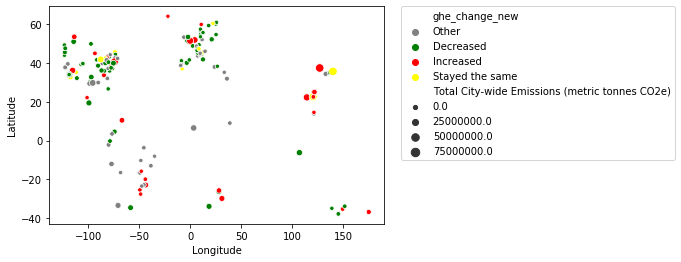

In [20]:
fig2 = sns.scatterplot(x = 'Longitude', y = 'Latitude', size ='Total City-wide Emissions (metric tonnes CO2e)',
                       hue = 'ghe_change_new', palette = ['gray', 'green', 'red', 'yellow'], data = ghe,
                      )
fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # this line of code jus

Now, our plot communicates a city's location, its relative amount of emmisions, and whether its emissions increased or decreased since the previous year.

<font color = '5780BC'>

### Part Four: Overlay Data Onto Map

The last step of our data visualization is overlaying this scatterplot onto a world map. This will make our visualization much clearer and more effective. To do this, we will use the __Plotly__ package, which has some really powerful functionality to make these geospatial visualizations. Plotly also has interactive functionality, so you can hover over points and explore the figure in depth. 

In [21]:
# import the Plotly express package
import plotly.graph_objects as go

Since our GHE emissions ('Total City-Wide Emssions (metrics tonnes CO2e)') are measured on the order of tens of millions, we need to scale down these values, so they will fit on our figure.

To scale our data, Plotly reccomends using this code to get our size reference:

<font color = 'royalblue'> sizeref = 2. * max(array of size values) / (desired maximum marker size ** 2)
    
<font color = 'black'> The 'desired maximum marker' size is determined by the user. You'll have to plot some points on a plotly scatterplot to determine what size looks best as a maximum on your graph. After trying out some values, I figured decided 30 was a good maximum.  

In [22]:
sizes = ghe['Total City-wide Emissions (metric tonnes CO2e)'] # get array of data 
sizeref = 2. * max(sizes) / (30 ** 2) # after trying a few marker sizes, 30 looked like the best as a max size
sizes = (ghe['Total City-wide Emissions (metric tonnes CO2e)']/ sizeref) # divide emissions by size reference to scale data

In [23]:
# save these values in a new column in the ghe dataframe
ghe['sizes'] = sizes

In this figure, we are plotting points whose colors change based on whether they increased or decreased their emissions. In order to change the colors in this way, Plotly needs a column to look at to assign these varying colors, so we need to create a new colum that assigns a color to an observation, based on whether they increased/ decreased emissions. 

In [24]:
# get list of colors (I chose these html codes on https://htmlcolorcodes.com/color-picker/)
colors = ['#FFC300', # yellow
          '#84AD61', # green
         '#FF5733', # red
         '#CAC9C1'] # gray

# now make new column that assigns color based on whether ghe increased, decreased, etc.
ghe['colors'] = np.where(ghe['ghe_change_new'] == 'Other', colors[3],
                        np.where(ghe['ghe_change_new'] == 'Decreased', colors[1],
                                np.where(ghe['ghe_change_new'] == 'Increased', colors[2],
                                        np.where(ghe['ghe_change_new'] == 'Stayed the same', colors[0], colors[0])
                                        )
                                )
                        )

The basic work flow for a plot like ours, where we have different colors that mean different things, looks like this:
- Initialize plot
- Add layer one 
- Add layer two
- Repeat until all layers (colors) are on plot

We'll want a legend that indicates what each of these layers means, so we let's make a list that we can refer to in our plot function. 

In [25]:
# make a list of names for the legend
plotlegend = ['Increased', 'Decreased', 'Stayed the same', 'Other']

We'll also want to split up our data by these different trace layers (in this case, colors), so we can easily add each to our plot one at a time. 

In [26]:
# split up the data based on the different traces in our legend 
ghe_green = ghe.loc[ghe['colors'] == colors[1], :] # green (decreased GHE)
ghe_red = ghe.loc[ghe['colors'] == colors[2], :] # red (increased GHE)
ghe_yellow = ghe.loc[ghe['colors'] == colors[0], :] # yellow (GHE stayed the same)
ghe_gray = ghe.loc[ghe['colors'] == colors[3], :] # gray (Other)

<font color = '5780BC'>

# The Final Product

Now it's time to make our map. I've annotated the arguments with comments.

In [30]:
# fig4 = go.Figure() # initialize figure

# add points whose GHE stayed the same
fig4.add_trace(go.Scattergeo(locationmode = 'ISO-3',      # sets the scope of the map to a world view
                            lat = ghe_yellow['Latitude'], # gives plotly the latitude of our data
                            lon = ghe_yellow['Longitude'], # gives plotly the longitude of our data
                             
                             # these next few lines builds the information inside the hover box
                            text = ghe_yellow['City Short Name'] +   # add city name
                                   ', ' + 
                                   ghe_yellow['Country'] + # add country
                                   '<br>' +
                             # line below adds Green House Emissions and formats it to be more legible 
                                   (ghe_yellow['Total City-wide Emissions (metric tonnes CO2e)'] / 1e6).astype('str')  + 
                                   ' million tonnes C02e', # adds units to GHE
                            marker_size = ghe_yellow['sizes'], # changes size of point based on GHE (scaled in 'size' column)
                            marker_sizemode = 'area', # method of sizing point
                            marker_color = ghe_yellow['colors'], # change color of point
                            name = 'GHE ' + plotlegend[2])) # add name of legend

# now add those that increaesed GHE, following the same pattern as above
fig4.add_trace(go.Scattergeo(locationmode = 'ISO-3',
                            lat = ghe_red['Latitude'],
                            lon = ghe_red['Longitude'],
                            text = ghe_red['City Short Name'] + 
                                   ', ' + 
                                   ghe_red['Country'] + 
                                   '<br>' +
                                   (ghe_red['Total City-wide Emissions (metric tonnes CO2e)'] / 1e6).astype('str')  +
                                   ' million tonnes C02e',
                            marker_size = ghe_red['sizes'],
                            marker_sizemode = 'area',
                            marker_color = ghe_red['colors'],
                            name = 'GHE ' + plotlegend[0]))


# add those that decreased GHE
fig4.add_trace(go.Scattergeo(locationmode = 'ISO-3',
                            lat = ghe_green['Latitude'],
                            lon = ghe_green['Longitude'],
                            text = ghe_green['City Short Name'] + 
                                   ', ' + 
                                   ghe_green['Country'] + 
                                   '<br>' +
                                   (ghe_green['Total City-wide Emissions (metric tonnes CO2e)'] / 1e6).astype('str')  +
                                   ' million tonnes C02e',                            
                            marker_size = ghe_green['sizes'],
                            marker_sizemode = 'area',
                            marker_color = ghe_green['colors'],
                            name = 'GHE ' + plotlegend[1]))



# now, add those in the 'other group'
fig4.add_trace(go.Scattergeo(locationmode = 'ISO-3',
                            lat = ghe_gray['Latitude'],
                            lon = ghe_gray['Longitude'],
                            text = ghe_gray['City Short Name'] + 
                                   ', ' + 
                                   ghe_gray['Country'] + 
                                   '<br>' +
                                   (ghe_gray['Total City-wide Emissions (metric tonnes CO2e)'] / 1e6).astype('str')  +
                                   ' million tonnes C02e',
                            marker_size = ghe_gray['sizes'],
                            marker_sizemode = 'area',
                            marker_color = ghe_gray['colors'],
                            name = plotlegend[3]))




# change the layout of the graph, and the aesthetics of the map
fig4.update_layout(title_text = '2016 Global Green House Emissions<br>(in metric tonnes C02e)', # add title
                  showlegend = True, # show legend
                  geo_showocean = True, # show ocean
                  geo_oceancolor = '#DAECED', # change color of ocean
                  geo_landcolor = '#CECD7B', # change color of land
                  geo_showcoastlines = False, # get rid of borders on coasts
                  geo_showframe = False, # get rid of frame around plot
                  geo_lakecolor = '#DAECED') # change color of lakes to match the ocean
fig4.show()

Hover over points, zoom in, pan, and explore the data. 